## Importação das Bibliotecas

In [1]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np

# Pacotes gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Testes de Hipótese
from statsmodels.stats.proportion import proportions_ztest

# Funções customizadas
from libs import analise_dados

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

/home/matheus/projetos/renovacao_seguros/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importação da base de dados

In [2]:
xlsx = pd.ExcelFile('../data/raw/base-seguros.xlsx')
xlsx.sheet_names

['Metadados', 'Base']

In [3]:
# Metadados
pd.set_option('display.max_colwidth', None)
xlsx.parse(sheet_name='Metadados')

,Nome da coluna,Descrição
0,Flag_Renovou,Indica se o cliente renovou ou não o seguro no ano seguinte; 1 = Renovou e 0 = Não Renovou
1,Idade,Idade do cliente;
2,Perfil_Risco,"A evolução do perfil de risco do cliente. ""down"" quando dimimuiu, ""stable"" quando não muda, e ""up"" quando aumenta."
3,Diferenca_Perfil,Diferença de perfil entre o motorista e o cliente do seguro.
4,Genero,Genero do cliente.
5,Profissao,"Tipo de trabalho do cliente. ""medical"" (médico) ou ""normal"" (não médico)."
6,Tempo_Apolice,Tempo da apólice.
7,Uso_Veiculo,Uso do carro.
8,Qte_Apolices,Quantidade de apólices que o cliente tem.
9,Premio_Final,Valor final do premio a ser pago pelo cliente pela renovação.


In [4]:
df = xlsx.parse('Base')
df.head()

,Flag_Renovou,Idade,Perfil_Risco,Diferenca_Perfil,Genero,Profissao,Tempo_Apolice,Uso_Veiculo,Qte_Apolices,Premio_Final,Premio_Qte_Parc,Premio_Pago_Ult,Premio_Mercado,Premio_Orig,Veic_Idade,Veic_Idade_Compra,Veic_Garagem,Veic_Potencia,Veic_Regiao
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


## Preparação dos dados

### Informações

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23060 entries, 0 to 23059
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flag_Renovou       23060 non-null  int64  
 1   Idade              23060 non-null  int64  
 2   Perfil_Risco       23060 non-null  object 
 3   Diferenca_Perfil   23060 non-null  object 
 4   Genero             23060 non-null  object 
 5   Profissao          23060 non-null  object 
 6   Tempo_Apolice      23060 non-null  int64  
 7   Uso_Veiculo        23060 non-null  object 
 8   Qte_Apolices       23060 non-null  int64  
 9   Premio_Final       23060 non-null  float64
 10  Premio_Qte_Parc    23060 non-null  object 
 11  Premio_Pago_Ult    23060 non-null  float64
 12  Premio_Mercado     23060 non-null  float64
 13  Premio_Orig        23060 non-null  float64
 14  Veic_Idade         23060 non-null  int64  
 15  Veic_Idade_Compra  23060 non-null  int64  
 16  Veic_Garagem       230

### Missing Values

In [6]:
df.isnull().sum()

Flag_Renovou         0
Idade                0
Perfil_Risco         0
Diferenca_Perfil     0
Genero               0
Profissao            0
Tempo_Apolice        0
Uso_Veiculo          0
Qte_Apolices         0
Premio_Final         0
Premio_Qte_Parc      0
Premio_Pago_Ult      0
Premio_Mercado       0
Premio_Orig          0
Veic_Idade           0
Veic_Idade_Compra    0
Veic_Garagem         0
Veic_Potencia        0
Veic_Regiao          0
dtype: int64

### Duplicações

In [7]:
df.duplicated().sum()

0

- 23060 linhas (ou registros);
- 19 colunas (ou features);

- Não há valores duplicados ou faltantes

## Análise Exploratória dos Dados

### Relatório

In [8]:
import sweetviz as sv

sv_report = sv.analyze(df, 'Flag_Renovou')
sv_report.show_html()


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Observações

[Relatório](/home/matheus/projetos/renovacao_seguros/notebooks/reports/SWEETVIZ_REPORT.html)

- **Flag_Renovou**

    - Variável target
    - Desbalanceada: 0 aparece em 87%

- **Idade**

    - 50% dos clientes tem idade entre 35 a 49 anos

- **Perfil_Risco**

    - Aparentemente os clientes tendem a renovar quando o seu perfil de risco diminui (`down`)

- **Diferenca_Perfil**

    - A maioria dos clientes adquirem o seguro sendo eles mesmos ou os parceiros como motorista
    - Clientes mais novos tendem a renovar

- **Genero**

    - 64% de nossa base é composta por homens

- **Profissao**

    - 41% são médicos.

- **Tempo_Apolice**

    - 50% da nossa base possui até um ano de apolice
    - A tendencia é a não renovação com o passar do tempo

- **Uso_Veiculo**

    - A grande maioria, 85%, tem o véiculo para uso pessoal
    - Veiculos que são usados apenas para uso comercial tem um chance maior de renovação, porém há poucas amostras nessa categoria

- **Qte_Apolices**

    - Quase 80% da nossa base possui no máximo uma apólice

- **Premio_Final**

    - A mediana do valor a ser pago pelo cliente é de $312
    - 75% dos clientes pagam até $448

- **Premio_Qte_Parc**

    - 51% dos clientes preferem pagar em apenas uma parcela

- **Premio_Pago_Ult**

    - A mediana do valor pago pelo cliente no ultimo ano é de $311
    - 75% dos clientes pagaram até $450
    - Os valores se apresentam praticamente identicos ao do ano atual

- **Premio_Mercado**

    - A mediana do valor aproximado do mercado é de $317
    - 75% do mercado oferece até $434
    - Nossos valores estão condizentes com o mercado atual

- **Premio_Orig**

    - A mediana do valor estipulado pela área de pricing é $301
    - 75% estipula até $424
    - Temos um valor menor se comparado ao valor do premio pago pelo cliente

- **Veic_Idade**

    - 50% dos veiculos da nossa base possuem de 11 a 16 anos

- **Veic_Idade_Compra**

    - 50% dos veiculos da nossa base foram adquiridos entre 4 a 11 anos

### Correlação de Pearson

<Axes: >

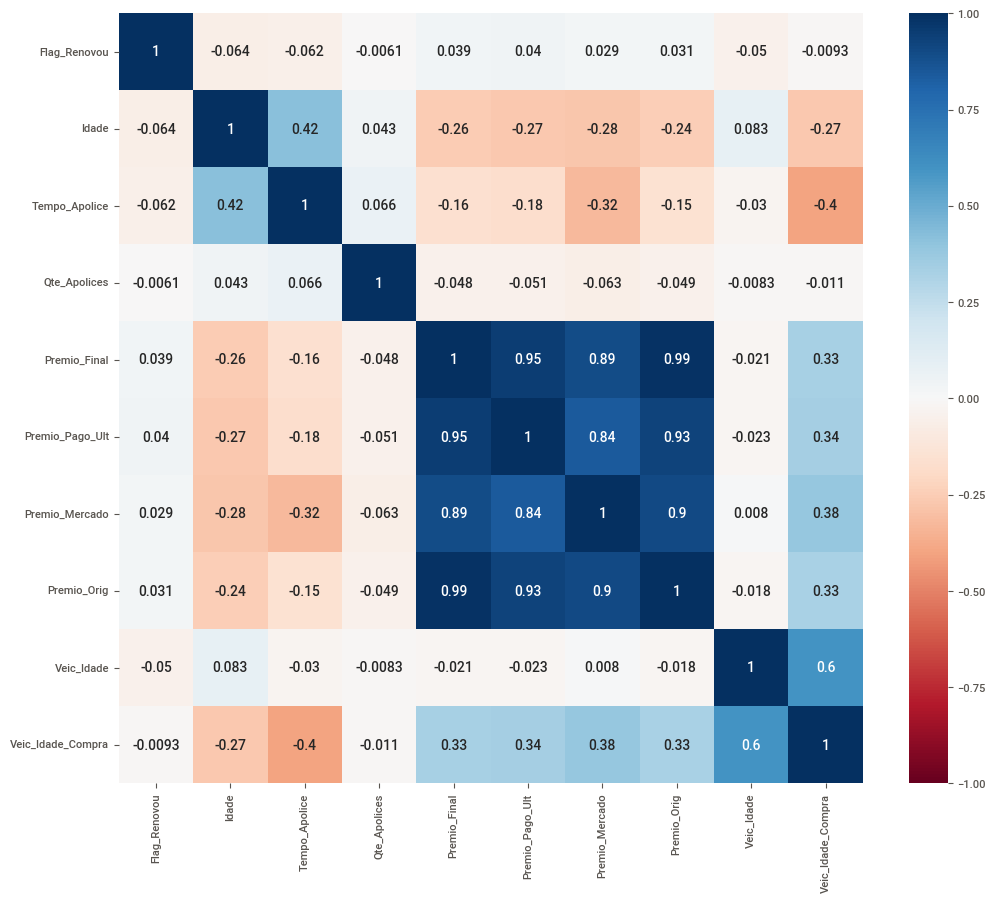

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', vmax=1, vmin=-1)

### Information Value

In [28]:
iv = analise_dados.analise_iv(df, 'Flag_Renovou')
iv.get_lista_iv()

Flag_Renovou,IV
Variavel,
Perfil_Risco,0.07
Tempo_Apolice,0.06
Idade,0.04
Veic_Regiao,0.03
Uso_Veiculo,0.03
Premio_Mercado,0.02
Veic_Idade,0.02
Premio_Pago_Ult,0.02
Premio_Qte_Parc,0.02


In [11]:
iv.get_bivariada('Perfil_Risco')

==> "Perfil_Risco" tem IV de 0.07


Flag_Renovou,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Perfil_Risco,down,1638.0,8517.0,10155.0,44.04,55.45,42.36,16.13,1.31,0.27,0.04
1,Perfil_Risco,stable,1231.0,10805.0,12036.0,52.19,41.67,53.74,10.23,0.78,-0.25,0.03
2,Perfil_Risco,up,85.0,784.0,869.0,3.77,2.88,3.90,9.78,0.74,-0.30,0.00


In [12]:
iv.get_bivariada('Tempo_Apolice')

==> "Tempo_Apolice" tem IV de 0.06


Flag_Renovou,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tempo_Apolice,"(-0.01, 1.0]",1866.0,11323.0,13189.0,57.19,63.17,56.32,14.15,1.12,0.11,0.01
1,Tempo_Apolice,"(1.0, 2.0]",400.0,2550.0,2950.0,12.79,13.54,12.68,13.56,1.07,0.07,0.00
2,Tempo_Apolice,"(2.0, 3.0]",119.0,778.0,897.0,3.89,4.03,3.87,13.27,1.04,0.04,0.00
3,Tempo_Apolice,"(3.0, 5.0]",218.0,1465.0,1683.0,7.30,7.38,7.29,12.95,1.01,0.01,0.00
4,Tempo_Apolice,"(5.0, 8.0]",205.0,2366.0,2571.0,11.15,6.94,11.77,7.97,0.59,-0.53,0.03
5,Tempo_Apolice,"(8.0, 17.0]",146.0,1624.0,1770.0,7.68,4.94,8.08,8.25,0.61,-0.49,0.02


In [13]:
iv.get_bivariada('Idade')

==> "Idade" tem IV de 0.04


Flag_Renovou,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Idade,"(18.99, 29.0]",434.0,2003.0,2437.0,10.57,14.69,9.96,17.81,1.47,0.39,0.02
1,Idade,"(29.0, 33.0]",358.0,2093.0,2451.0,10.63,12.12,10.41,14.61,1.16,0.15,0.00
2,Idade,"(33.0, 36.0]",342.0,2187.0,2529.0,10.97,11.58,10.88,13.52,1.06,0.06,0.00
3,Idade,"(36.0, 38.0]",253.0,1683.0,1936.0,8.40,8.56,8.37,13.07,1.02,0.02,0.00
4,Idade,"(38.0, 41.0]",320.0,2450.0,2770.0,12.01,10.83,12.19,11.55,0.89,-0.12,0.00
5,Idade,"(41.0, 43.0]",209.0,1553.0,1762.0,7.64,7.08,7.72,11.86,0.92,-0.08,0.00
6,Idade,"(43.0, 47.0]",352.0,2298.0,2650.0,11.49,11.92,11.43,13.28,1.04,0.04,0.00
7,Idade,"(47.0, 52.0]",240.0,1813.0,2053.0,8.90,8.12,9.02,11.69,0.90,-0.11,0.00
8,Idade,"(52.0, 61.0]",258.0,2034.0,2292.0,9.94,8.73,10.12,11.26,0.86,-0.15,0.00
9,Idade,"(61.0, 85.0]",188.0,1992.0,2180.0,9.45,6.36,9.91,8.62,0.64,-0.45,0.02


In [14]:
iv.get_bivariada('Veic_Regiao')

==> "Veic_Regiao" tem IV de 0.03


Flag_Renovou,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Veic_Regiao,Reg1,65.0,553.0,618.0,2.68,2.20,2.75,10.52,0.80,-0.22,0.00
1,Veic_Regiao,Reg10,139.0,918.0,1057.0,4.58,4.71,4.57,13.15,1.03,0.03,0.00
2,Veic_Regiao,Reg11,86.0,472.0,558.0,2.42,2.91,2.35,15.41,1.24,0.22,0.00
3,Veic_Regiao,Reg12,239.0,1086.0,1325.0,5.75,8.09,5.40,18.04,1.50,0.41,0.01
4,Veic_Regiao,Reg13,86.0,510.0,596.0,2.58,2.91,2.54,14.43,1.15,0.14,0.00
5,Veic_Regiao,Reg14,204.0,1085.0,1289.0,5.59,6.91,5.40,15.83,1.28,0.25,0.00
6,Veic_Regiao,Reg2,41.0,515.0,556.0,2.41,1.39,2.56,7.37,0.54,-0.62,0.01
7,Veic_Regiao,Reg3,223.0,1604.0,1827.0,7.92,7.55,7.98,12.21,0.95,-0.05,0.00
8,Veic_Regiao,Reg4,548.0,3777.0,4325.0,18.76,18.55,18.79,12.67,0.99,-0.01,0.00
9,Veic_Regiao,Reg5,240.0,2151.0,2391.0,10.37,8.12,10.70,10.04,0.76,-0.27,0.01


In [15]:
iv.get_bivariada('Uso_Veiculo')

==> "Uso_Veiculo" tem IV de 0.03


Flag_Renovou,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Uso_Veiculo,commercial,2.0,8.0,10.0,0.04,0.07,0.04,20.00,1.75,0.56,0.00
1,Uso_Veiculo,private or freelance work,2661.0,16906.0,19567.0,84.85,90.08,84.08,13.60,1.07,0.07,0.00
2,Uso_Veiculo,unknown,291.0,3192.0,3483.0,15.10,9.85,15.88,8.35,0.62,-0.48,0.03


As variáveis apresentam apenas um poder de separação fraco com a variável target.
As maiores são:

- `Perfil_Risco`
- `Tempo_Apolice`
- `Idade`

## Testes de Hipótese

Sendo:

$H_0: \text{Proporções iguais}$

$H_a: \text{Proporções diferentes}$

In [16]:
def hipotese_proporcaoz(a, b, alpha=0.05):

    successes = [a.sum().values[0], b.sum().values[0]]
    nobs = [len(a), len(b)]

    tstat, pvalue = proportions_ztest(successes, nobs)
    print(f'Proporção do grupo 1: {round(a.mean().values[0]*100, 2)}%')
    print(f'Proporção do grupo 2: {round(b.mean().values[0]*100, 2)}%')
    print('-'*30)
    print(f'Estatistica de teste: {tstat}\nP-Valor: {pvalue}')
    print('-'*30)
    if pvalue < alpha:
        print(f'O p-valor ({round(pvalue,4)}) é MENOR que o nivel de significância ({round(alpha, 4)}), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais')
    else:
        print(f'O p-valor ({round(pvalue,4)}) é MAIOR ou IGUAL ao nivel de significância ({round(alpha, 4)}), logo NÃO temos evidências estatisticamente significativas para rejeitar a hipótese nula de que as proporções são iguais')

### `Perfil_Risco`

In [17]:
risco_down = df[df['Perfil_Risco'] == 'down'][['Flag_Renovou']]
risco_stable = df[df['Perfil_Risco'] == 'stable'][['Flag_Renovou']]
risco_up = df[df['Perfil_Risco'] == 'up'][['Flag_Renovou']]

In [18]:
hipotese_proporcaoz(risco_down, risco_stable)

Proporção do grupo 1: 16.13%
Proporção do grupo 2: 10.23%
------------------------------
Estatistica de teste: 13.055755883012049
P-Valor: 5.892228400549272e-39
------------------------------
O p-valor (0.0) é MENOR que o nivel de significância (0.05), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais


In [19]:
hipotese_proporcaoz(risco_down, risco_up)

Proporção do grupo 1: 16.13%
Proporção do grupo 2: 9.78%
------------------------------
Estatistica de teste: 4.946429560941365
P-Valor: 7.558706150128348e-07
------------------------------
O p-valor (0.0) é MENOR que o nivel de significância (0.05), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais


In [20]:
hipotese_proporcaoz(risco_up, risco_stable)

Proporção do grupo 1: 9.78%
Proporção do grupo 2: 10.23%
------------------------------
Estatistica de teste: -0.41985433750607837
P-Valor: 0.6745918670948433
------------------------------
O p-valor (0.6746) é MAIOR ou IGUAL ao nivel de significância (0.05), logo NÃO temos evidências estatisticamente significativas para rejeitar a hipótese nula de que as proporções são iguais


### `Tempo_Apolice`

In [21]:
tempo_apolice1 = df[df['Tempo_Apolice'] < 5][['Flag_Renovou']]
tempo_apolice2 = df[df['Tempo_Apolice'] >= 5][['Flag_Renovou']]

hipotese_proporcaoz(tempo_apolice1, tempo_apolice2)

Proporção do grupo 1: 14.02%
Proporção do grupo 2: 8.47%
------------------------------
Estatistica de teste: 10.418582138574976
P-Valor: 2.0397120365231222e-25
------------------------------
O p-valor (0.0) é MENOR que o nivel de significância (0.05), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais


### `Idade`

In [22]:
idade1 = df[df['Idade'] < 38][['Flag_Renovou']]
idade2 = df[df['Idade'] >= 38][['Flag_Renovou']]

hipotese_proporcaoz(idade1, idade2)

Proporção do grupo 1: 15.02%
Proporção do grupo 2: 11.54%
------------------------------
Estatistica de teste: 7.606489829673213
P-Valor: 2.81640380858996e-14
------------------------------
O p-valor (0.0) é MENOR que o nivel de significância (0.05), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais


### `Veic_Regiao`

In [23]:
regiao12 = df[df['Veic_Regiao'] == 'Reg12'][['Flag_Renovou']]
regiao2 = df[df['Veic_Regiao'] == 'Reg2'][['Flag_Renovou']]

hipotese_proporcaoz(regiao12, regiao2)

Proporção do grupo 1: 18.04%
Proporção do grupo 2: 7.37%
------------------------------
Estatistica de teste: 5.928848156281663
P-Valor: 3.050670209261981e-09
------------------------------
O p-valor (0.0) é MENOR que o nivel de significância (0.05), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais


### `Uso_Veiculo`

In [24]:
uso_private = df[df['Uso_Veiculo'] == 'private or freelance work'][['Flag_Renovou']]
uso_commercial = df[df['Uso_Veiculo'] == 'commercial'][['Flag_Renovou']]
uso_unknown = df[df['Uso_Veiculo'] == 'unknown'][['Flag_Renovou']]

In [25]:
hipotese_proporcaoz(uso_commercial, uso_private)

Proporção do grupo 1: 20.0%
Proporção do grupo 2: 13.6%
------------------------------
Estatistica de teste: 0.5902625918708383
P-Valor: 0.5550146146234112
------------------------------
O p-valor (0.555) é MAIOR ou IGUAL ao nivel de significância (0.05), logo NÃO temos evidências estatisticamente significativas para rejeitar a hipótese nula de que as proporções são iguais


In [26]:
hipotese_proporcaoz(uso_commercial, uso_unknown)

Proporção do grupo 1: 20.0%
Proporção do grupo 2: 8.35%
------------------------------
Estatistica de teste: 1.3265135867409386
P-Valor: 0.18466963776638823
------------------------------
O p-valor (0.1847) é MAIOR ou IGUAL ao nivel de significância (0.05), logo NÃO temos evidências estatisticamente significativas para rejeitar a hipótese nula de que as proporções são iguais


In [27]:
hipotese_proporcaoz(uso_private, uso_unknown)

Proporção do grupo 1: 13.6%
Proporção do grupo 2: 8.35%
------------------------------
Estatistica de teste: 8.533926096348438
P-Valor: 1.414632252314451e-17
------------------------------
O p-valor (0.0) é MENOR que o nivel de significância (0.05), logo temos evidências estatisticamente significativas para REJEITAR a hipótese nula de que as proporções são iguais
